In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ema_workbench.analysis import prim, feature_scoring, dimensional_stacking
from problem_formulation import get_model_for_problem_formulation
from plotting_function import customize_save_and_show_plot

# Step 4: Policy Exploration
In this file we will explore the previously identified policies under different scenarios and see where they perform more strongly, what uncertainties impact them and delve deeper into their effect on the model. 

## Let us first load the CSVs
We load the saved CSV files into pandas DataFrames. These files contain the data from the previously found policies and their runs under different scenarios and the no policy experiments, so in essence what would happen if there was no investment policy.

In [2]:
# Construct the path to the merged_archives.csv file
current_dir = os.getcwd()
input_dir = os.path.join(current_dir, 'data', 'output_data', 'Step3')
policy_evaluation_experiments_df = pd.read_csv(os.path.join(input_dir,'policy_evaluation_experiments.csv'))
policy_evaluation_outcomes_df = pd.read_csv(os.path.join(input_dir,'policy_evaluation_outcomes.csv'))

# Construct the path to the merged_archives.csv file
input_dir_2 = os.path.join(current_dir, 'data', 'output_data')
no_policy_experiments_df = pd.read_csv(os.path.join(input_dir_2, 'no_policy_experiments.csv'))
no_policy_outcomes_df = pd.read_csv(os.path.join(input_dir_2, 'no_policy_outcomes.csv'))

In [3]:
# Drop the 'Unnamed: 0' column from the no_policy_experiments_df and  no_policy_outcomes_df dataframe
no_policy_experiments_df = no_policy_experiments_df.drop(columns='Unnamed: 0')
no_policy_outcomes_df = no_policy_outcomes_df.drop(columns='Unnamed: 0')

# Iterate over the list containing no_policy_outcomes_df and policy_evaluation_outcomes_df dataframes
for dataframe in [no_policy_outcomes_df, policy_evaluation_outcomes_df]:
    # Replace underscores with spaces in the column names of each dataframe
    dataframe.columns = dataframe.columns.str.replace('_', ' ')

We inspect the data by printing the contents of the random experiments and outcomes DataFrames. This step helps us understand the structure and content of the data.

In [4]:
# Print the column names of the policy_evaluation_outcomes_df dataframe
print(policy_evaluation_outcomes_df.columns) 

Index(['A.4 Expected Annual Damage', 'A.4 Dike Investment Costs',
       'A.4 Expected Number of Deaths', 'A.5 Expected Annual Damage',
       'A.5 Dike Investment Costs', 'A.5 Expected Number of Deaths',
       'Combined Expected Annual Damage', 'Combined Dike Investment Costs',
       'Combined Expected Number of Deaths', 'policy'],
      dtype='object')


Next we split the dataframe into useful dateframes for the comparison, of the policy outcomes with the non-policy outcomes. We either look at the combined outcomes, or the seperate outcomes for Dike ring 4 and 5. In the rest of the analysis we will only look at the combined outcome since this conveys the most direct information for the waterboard.

In [5]:
# Select specific columns related to combined outcomes from policy_evaluation_outcomes_df
policy_evaluation_outcomes_combined = policy_evaluation_outcomes_df[['Combined Expected Annual Damage', 'Combined Dike Investment Costs',
       'Combined Expected Number of Deaths', 'policy']]

# Select specific columns related to separate outcomes from policy_evaluation_outcomes_df
policy_evaluation_outcomes_seperate = policy_evaluation_outcomes_df[['A.4 Expected Annual Damage', 'A.4 Dike Investment Costs',
       'A.4 Expected Number of Deaths', 'A.5 Expected Annual Damage', 'A.5 Dike Investment Costs', 'A.5 Expected Number of Deaths', 'policy']]

# Select specific columns related to combined outcomes from no_policy_outcomes_df
no_policy_outcomes_combined = no_policy_outcomes_df[['Combined Expected Annual Damage', 'Combined Dike Investment Costs',
       'Combined Expected Number of Deaths']]

# Select specific columns related to separate outcomes from no_policy_outcomes_df
no_policy_outcomes_separate = no_policy_outcomes_df[['A.4 Expected Annual Damage', 'A.4 Dike Investment Costs',
       'A.4 Expected Number of Deaths', 'A.5 Expected Annual Damage',
       'A.5 Dike Investment Costs', 'A.5 Expected Number of Deaths']]


# 1. Descriptives
We will now look at descriptives of the runs with no policy and the runs with the previously found policies. To look at the potential spread of the variables, related to the objectives.

C:\Users\jaspe\PycharmProjects\MBDM assignments\MBDM-project\final assignment\data\plots\Step4
Plot saved to C:\Users\jaspe\PycharmProjects\MBDM assignments\MBDM-project\final assignment\data\plots\Step4\Violin Plot of Combined Expected Number of Deaths.png


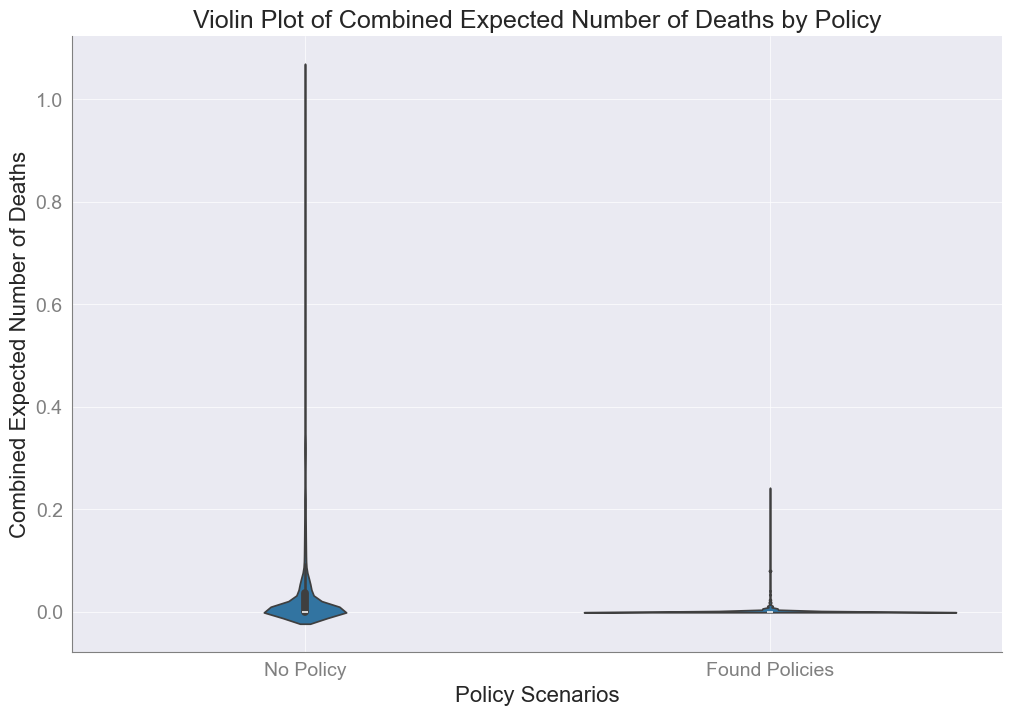

C:\Users\jaspe\PycharmProjects\MBDM assignments\MBDM-project\final assignment\data\plots\Step4
Plot saved to C:\Users\jaspe\PycharmProjects\MBDM assignments\MBDM-project\final assignment\data\plots\Step4\Violin Plot of Combined Dike Investment Costs.png


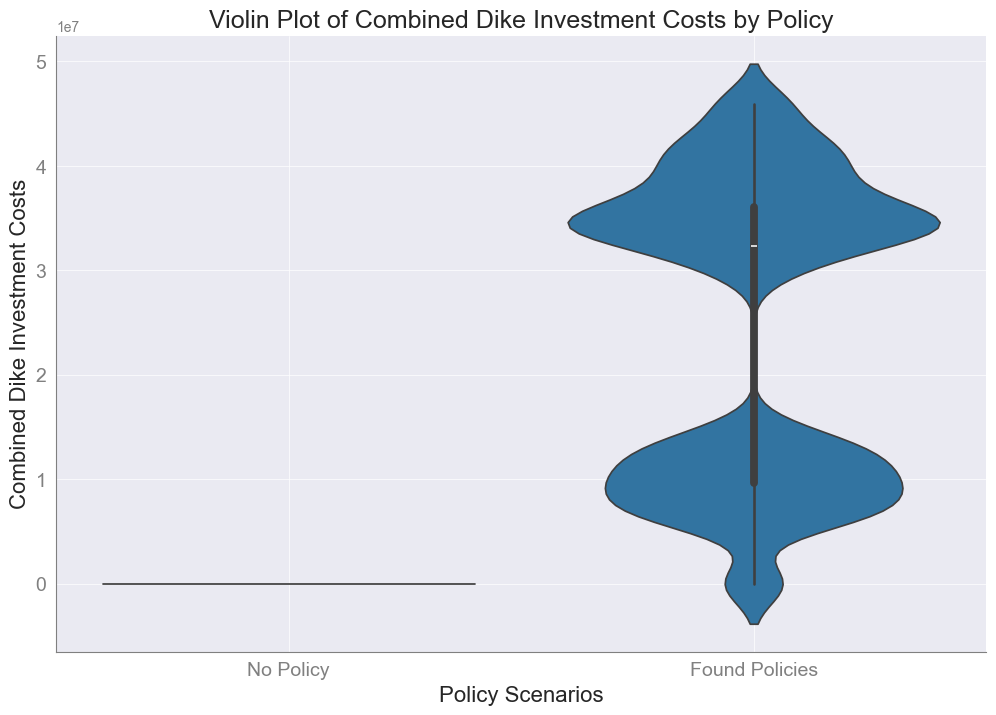

C:\Users\jaspe\PycharmProjects\MBDM assignments\MBDM-project\final assignment\data\plots\Step4
Plot saved to C:\Users\jaspe\PycharmProjects\MBDM assignments\MBDM-project\final assignment\data\plots\Step4\Violin Plot of Combined Expected Annual Damage.png


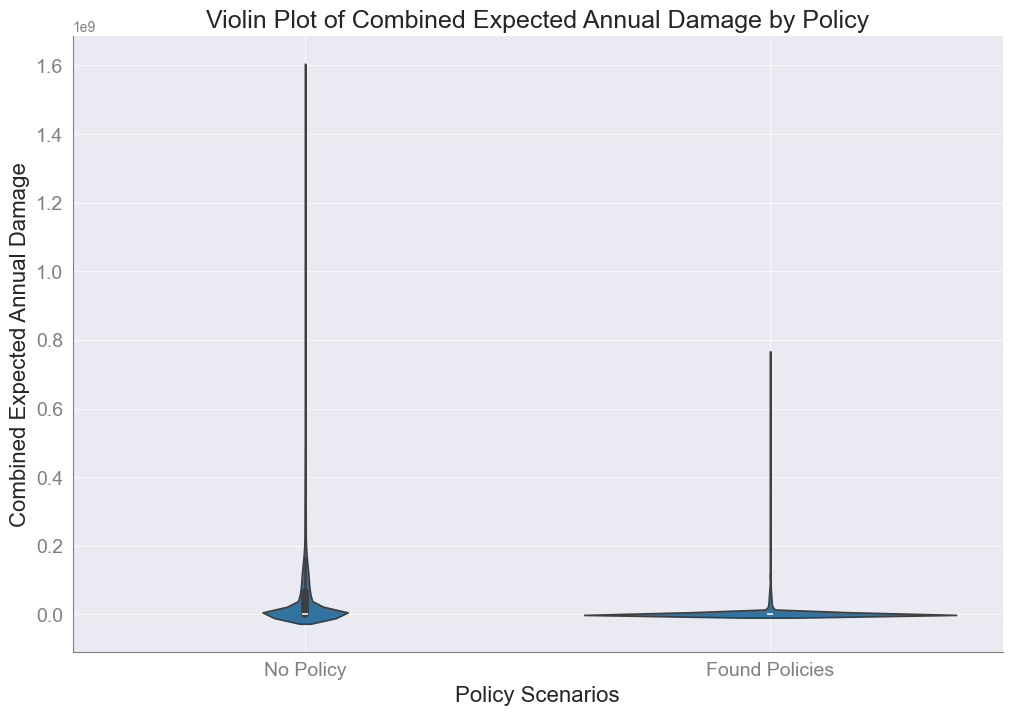

In [6]:
# Selecting the columns to plot
columns_to_plot = [
    'Combined Expected Number of Deaths',
    'Combined Dike Investment Costs',
    'Combined Expected Annual Damage'
]

# Combining the dataframes for the violin plot
combined_df = pd.concat([
    no_policy_outcomes_df[columns_to_plot].melt(var_name='Outcome', value_name='Value').assign(Policy='No Policy'),
    policy_evaluation_outcomes_df[columns_to_plot].melt(var_name='Outcome', value_name='Value').assign(Policy='Found Policies')
])

current_dir = os.getcwd()

# Plotting the violin plots for each outcome separately
for outcome in columns_to_plot:
    plt.figure(figsize=(12, 8))
    sns.violinplot(x='Policy', y='Value', data=combined_df[combined_df['Outcome'] == outcome])
    plt.title(f'Violin Plot of {outcome} by Policy')
    plt.xlabel('Policy Scenarios')
    plt.ylabel(outcome)
    customize_save_and_show_plot(f'Violin Plot of {outcome}', 'Step4')
    plt.show()

#### Expected number of deaths  
First of all, we see a huge difference in the spread of the scenarios that have no policy and the scenarios that have one of the found policies. The spread of deaths varies between 1.1 and 0, with nonetheless a high density of outcomes that surround the zero value and show an acceptable outcome. The spread of the expected deaths on the found policies only varies between 0.25 and 0. It shows an extreme density around 0 indicating that the biggest proportion of scenarios find a deathtoll of around 0. 
#### Investment Costs
The investment costs show the behaviour that one would expect of a no policy outcome. No policy equals no investment, therefore there are only values of zero in the no policy part of the plot. The found policies exhibit behaviour that might at first hand seem illogical but basically shows the different values for investment the found policies have. It shows that a lot of the policies we have found cost between 30 and 50 million. And that a lot of the policies we have found cost between 0 and 20 million. 
#### Expected Annual Damage
The expected annual damage shows that the found policies exhibit a relatively low value in most of the scenarios. Whilst the spread of the no policy option is very high and even shows scenarios that exhibit 1.6 trillion euros of damage. Which would far outweigh the initial investment. 


# 2. Runs with Our Policies
Set up directory for saving our policy plots

In [7]:
# Get the current working directory
current_dir = os.getcwd()

# Define the path for the experiment directory by joining the current directory with 'data/plots/Step4'
experiment_dir_our_policies = os.path.join(current_dir, 'data', 'plots', 'Step4')

# Create the directory if it doesn't exist
os.makedirs(experiment_dir_our_policies, exist_ok=True)

## 2.2. Feature Scoring
Next, we assess the importance of different features on the outcomes of the runs with the found policies, using feature scoring methods. Feature scoring helps in quantifying the influence of various uncertainties on the outcomes. We start by initializing the dike model and accessing the uncertainties. Then, we calculate feature scores to understand their impact on the outcomes of interest.

In [8]:
# Initialize the dike model from the problem formulation
dike_model, planning_steps = get_model_for_problem_formulation(2)

# Access and print the uncertainties
dike_model_uncertainties = dike_model.uncertainties

# Create a list of uncertainty names
uncertainties = []

# Print out each uncertainty in the list
for uncertainty in dike_model_uncertainties:
    uncertainties.append(uncertainty.name)
    
print(uncertainties)  

['discount rate 0', 'discount rate 1', 'discount rate 2', 'A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_pfail', 'A.1_Brate', 'A.2_Bmax', 'A.2_pfail', 'A.2_Brate', 'A.3_Bmax', 'A.3_pfail', 'A.3_Brate', 'A.4_Bmax', 'A.4_pfail', 'A.4_Brate', 'A.5_Bmax', 'A.5_pfail', 'A.5_Brate']


We extract the relevant uncertainties from the no policy experiments DataFrame. This isolates the 19 variables that will be used for feature scoring.

In [9]:
policy_evaluation_experiments_uncertainties = policy_evaluation_experiments_df.loc[:,uncertainties]

print(policy_evaluation_experiments_uncertainties)

       discount rate 0  discount rate 1  discount rate 2  \
0                  4.5              3.5              1.5   
1                  4.5              1.5              2.5   
2                  4.5              4.5              3.5   
3                  2.5              3.5              2.5   
4                  1.5              1.5              4.5   
...                ...              ...              ...   
24995              2.5              2.5              4.5   
24996              1.5              2.5              1.5   
24997              2.5              3.5              2.5   
24998              2.5              3.5              1.5   
24999              1.5              1.5              1.5   

       A.0_ID flood wave shape    A.1_Bmax  A.1_pfail  A.1_Brate    A.2_Bmax  \
0                           19  286.895417   0.502588        1.0  281.684940   
1                           59  192.667569   0.242897        1.5  206.218197   
2                           64  296.336

We now calculate the scores for each uncertainty, indicating how strongly each one affects the various outcomes. The heatmap visually represents these scores, with higher scores indicating a greater impact.

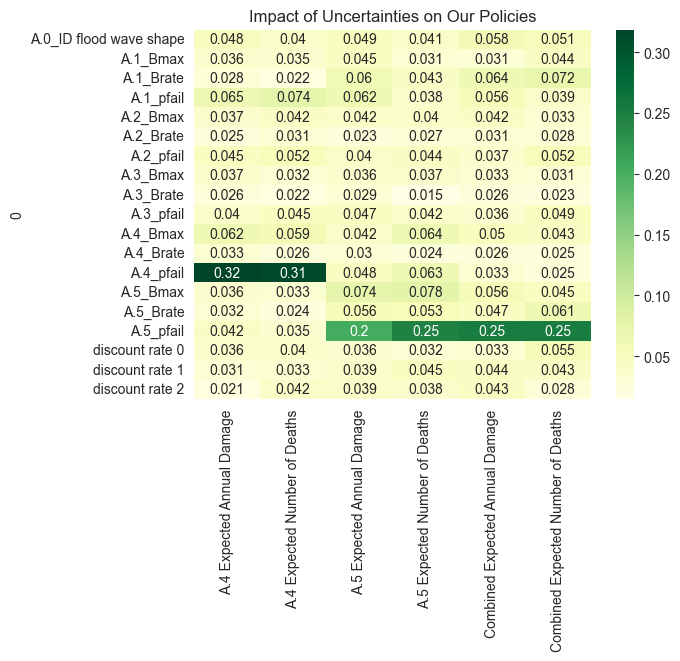

In [10]:
# Let us now calculate the feature scores for the different uncertainties, and their impact on the outcomes of interest
feature_scores = feature_scoring.get_feature_scores_all(policy_evaluation_experiments_uncertainties, policy_evaluation_outcomes_df.drop(columns=['A.4 Dike Investment Costs', 'A.5 Dike Investment Costs', 'Combined Dike Investment Costs', 'policy']))
sns.heatmap(feature_scores, cmap="YlGn", annot=True)
plt.title("Impact of Uncertainties on Our Policies")

# Saving the plot to the 'plots' folder within the 'experiment' folder
plot_name = "feature_scores_our_policy"
plot_path = os.path.join(experiment_dir_our_policies, f"{plot_name}.png")
plt.savefig(plot_path)

plt.show()

#### Interpretation
Dike ring 4 and 5 should look at their respective p-fail as the most important indicator for the expected annual damage and the expected number of deaths. However, when we look at the waterboard and the combined expected number of deaths and the combined expected annual damage, the p-fail of dike 5 explains more significantly more variance than dike 4. This could be due to a more rural and densely populated area surrounding dike 5. 
#### The bigger picture
When we look at the gradual development of the factor scores throughout the different experiments and runs we had, it becomes evident that the uncertainties become less significant in explaining the deaths and damages. Suggesting that the policies explain more of the uncertainty. In the run with the found policy this effect has become even stronger than was the case in the many random policies run of before. 

## 2.3. Dimensional Stacking
We will now use dimensional stacking to understand multi-dimensional interactions between features and outcomes. This technique helps in visualizing how different combinations of uncertainties influence a specific outcome variable.

This method creates a multi-dimensional pivot plot, showing how different levels of uncertainties interact to produce high values of a particular outcome (in this case, the 90th percentile of damage values in the runs with the found policies). It helps in identifying significant combinations of uncertainties that lead to extreme outcomes.

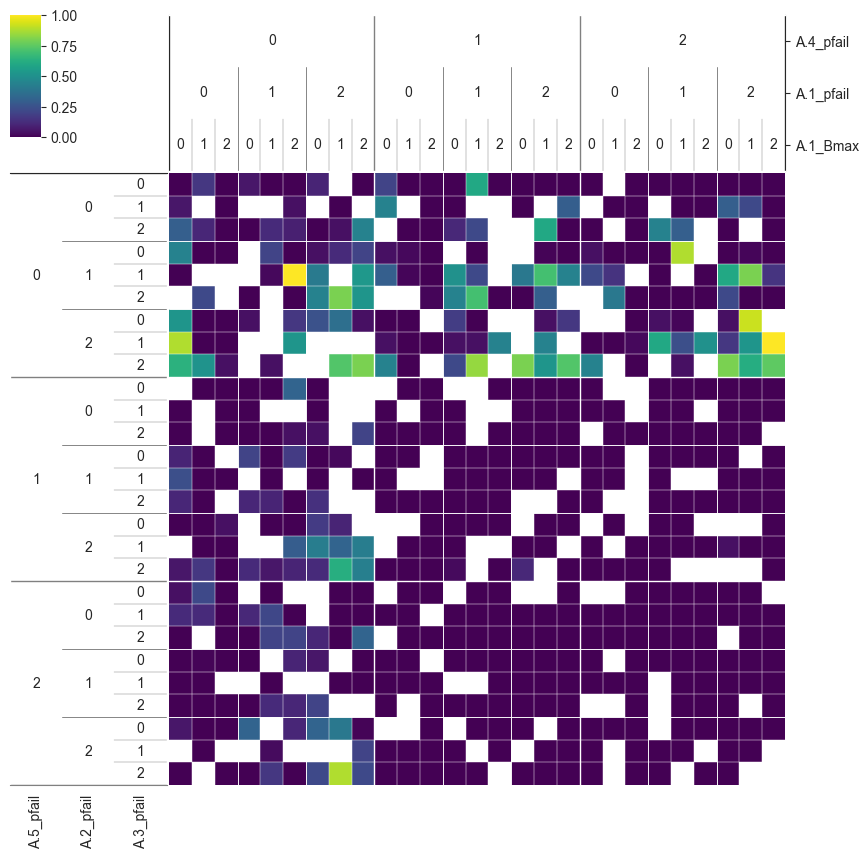

In [11]:
# Set the policy evaluation experiments uncertainties
x_our_policy = policy_evaluation_experiments_uncertainties

# Determine if the combined expected annual damage is in the top 10%
damage_our_policy = policy_evaluation_outcomes_df['Combined Expected Annual Damage'].values > np.percentile(policy_evaluation_outcomes_df['Combined Expected Annual Damage'], 90)

# Create a pivot plot for the combined expected annual damage
dimensional_stacking.create_pivot_plot(x_our_policy, damage_our_policy, nr_levels=3)

# Save the plot for the combined expected annual damage
plot_name = "dimensional_stacking_annual_damage_our_policy"
plot_path = os.path.join(experiment_dir_our_policies, f"{plot_name}.png")
plt.savefig(plot_path)

# Show the plot
plt.show()

Scenarios with a low A4 pfail and a low A5 pfail seem to define the worst outcomes for the combined expected annual damage. This is in line with the factor score, defining that a lower pfail leads to a higher chance of the dike breaking down. We also see that the A4 breakdown, is less impactful on the worse outcomes than A5. Since in all categories with a high A5 breakdown we see a lot of worse outcomes cases and in A4 this is less dense. Furthermore, a less likely breakdown of dike 1 in combination with a higher breakdown chance of dike 4, dike 5 or both leads to outcomes that are even worse and negatively effect the waterboards targets. The same, but less extreme, counts for dike 2 and 3 breaking down. This all makes sense due to the dependence between upstream and downstream parts of the river, with dike 1,2 and 3 potentially heightening the water for 4 and 5. 

#### The bigger picture
Again, we see the same pattern as without policy from before, with the same relations and uncertainties playing their part. This goes to show that the policies we found are still sensitive to the same uncertainties as before, however the mean absolute nature of the fluctuations is weaker. 

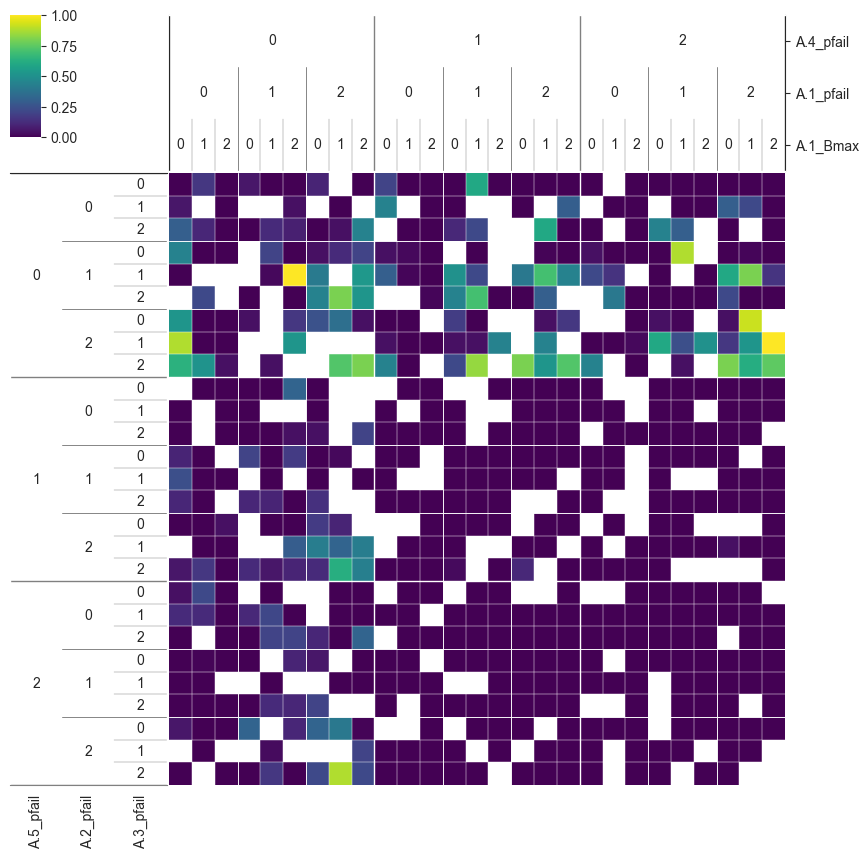

In [12]:
# Set the policy evaluation experiments uncertainties again (if needed)
x_our_policy = policy_evaluation_experiments_uncertainties

# Determine if the combined expected number of deaths is in the top 10%
deaths_our_policy = policy_evaluation_outcomes_df['Combined Expected Number of Deaths'].values > np.percentile(policy_evaluation_outcomes_df['Combined Expected Number of Deaths'], 90)

# Create a pivot plot for the combined expected number of deaths
dimensional_stacking.create_pivot_plot(x_our_policy, deaths_our_policy, nr_levels=3)

# Save the plot for the combined expected number of deaths
plot_name = "dimensional_stacking_deaths_our_policy"
plot_path = os.path.join(experiment_dir_our_policies, f"{plot_name}.png")
plt.savefig(plot_path)

# Show the plot
plt.show()

Just like we established before  the correlation between damage and deaths, leads to figures that exhibit almost exactly the same behaviour. Therefore, the interpretation is similar too. Again A5 is the main predictor and the same relations hold up as in the damage figure. 

## 2.4. PRIM
PRIM (Patient Rule Induction Method) will now be used to identify regions in the data that lead to specific outcomes. By focusing on the worst-case scenarios, we can understand which combinations of uncertainties are most critical. We apply PRIM to the 10% worst outcomes for the variables damage and deaths, identifying the regions (or "boxes") in the uncertainty space that lead to these extreme outcomes.

In [13]:
# Define the path for the PRIM experiment directory
experiment_dir_our_policies_PRIM = os.path.join(experiment_dir_our_policies, 'PRIM')

# Create the PRIM experiment directory if it doesn't exist
os.makedirs(experiment_dir_our_policies_PRIM, exist_ok=True)

### 2.4.1. Expected Annual Damage
We apply the PRIM algorithm to identify regions in the data with the highest expected annual damage. The threshold and peel_alpha parameters control the sensitivity of the algorithm in identifying significant regions.

In [14]:
# Apply PRIM to the 10% worst outcomes for the expected annual damage (highest number of damage)
prim_alg = prim.Prim(x_our_policy, damage_our_policy, threshold=0.5, peel_alpha=0.1)

# Find the optimal box using PRIM
box1 = prim_alg.find_box()

We will now make a plot that shows the trade-off between coverage (the proportion of cases captured by the box) and density (the proportion of cases within the box that meet the criterion). Annotating the plot helps in selecting the optimal box for further analysis.

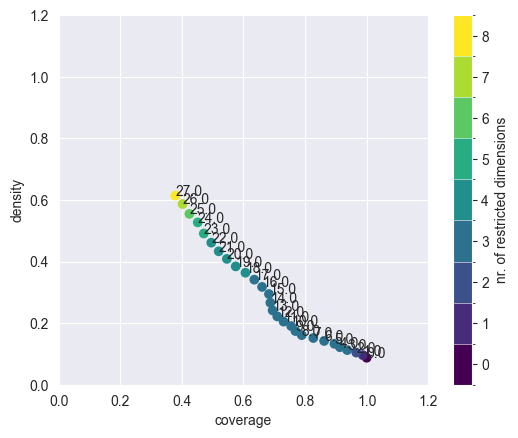

In [15]:
# Show the tradeoff of the created box
box1.show_tradeoff(annotated=True)

# Save the tradeoff plot
plot_name = "tradeoff_damage_our_policy"
plot_path = os.path.join(experiment_dir_our_policies_PRIM, f"{plot_name}.png")
plt.savefig(plot_path)

# Show the plot
plt.show()

Firstly, it becomes evident that it is hard to achieve both a high coverage and a high density in this prim analysis. Coverage refers to the amount of cases that are getting picked up by the box, whilst density refers to how many cases in the box are the cases that we look for. It thereby seems to hard to define a box, that only contains bad outcomes and contains most of them. The algorithm also seems to need a lot of dimensions in order to define a ruleset that somewhat satisfies the density dimension. 

We will choose box 21 due to the relatively low amount of dimensions and relatively high amount of coverage and density. 

We inspect the selected box to understand the characteristics of the uncertainties within this region. This helps in identifying the critical combinations of uncertainties.

In [16]:
# Box X has been selected due to the +/- 80% density
box_number_of_choice = 21
box1.inspect(box_number_of_choice)[0]

coverage       0.519653
density        0.433143
id            21.000000
k           1137.000000
mass           0.105000
mean           0.433143
n           2625.000000
res_dim        4.000000
Name: 21, dtype: float64

             box 21                                       
                min       max      qp value       qp value
A.5_pfail  0.000001  0.196845           NaN  2.346812e-320
A.2_pfail  0.193054  0.999195  2.465151e-12            NaN
A.3_pfail  0.265303  0.999373  5.515015e-12            NaN
A.1_pfail  0.080774  0.999611  8.273383e-04            NaN


We see that there is only a coverage of 50% and a density of 43 percent in this box, indicating that the ruleset is having trouble finding all and only the cases of interest. Indicating that it is hard to assign certain uncertainties to certain outcomes. 

Let's now create a graphical representation of the selected box to provide a clearer view of the significant uncertainties and their ranges.

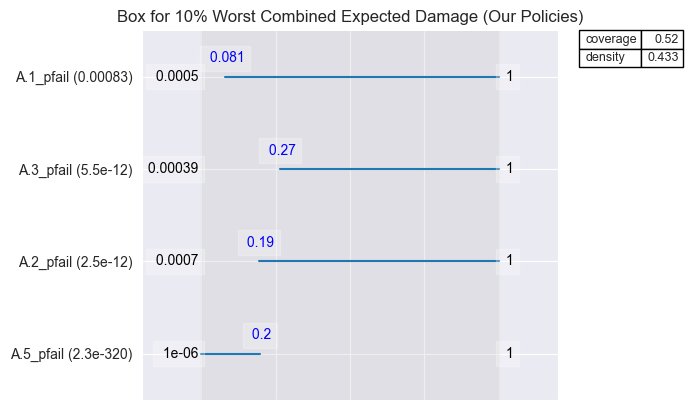

In [17]:
# Inspect the chosen box with a graph style
box1.inspect(box_number_of_choice, style="graph")

# Add a title to the box inspection plot
plt.title("Box for 10% Worst Combined Expected Damage (Our Policies)")

# Save the box inspection plot
plot_name = "inspect_box_damage_our_policy"
plot_path = os.path.join(experiment_dir_our_policies_PRIM, f"{plot_name}.png")
plt.savefig(plot_path)

# Show the plot
plt.show()

This plot shows the relationships between pairs of uncertainties within the selected box, helping to visualize the interactions that lead to extreme outcomes. As such we can see that A5 pfail has to be below 0.2 for the worst outcomes, A1 needs to be higher than 0.081, A3 above 0.27 and A2 pfail above 0.19. This seems to lead to the same pattern we could read in the dimensional stacking. 


This step verifies the robustness of the selected box by resampling and checking if the coverage and density remain consistent. High reproducibility indicates that the identified region is reliable.

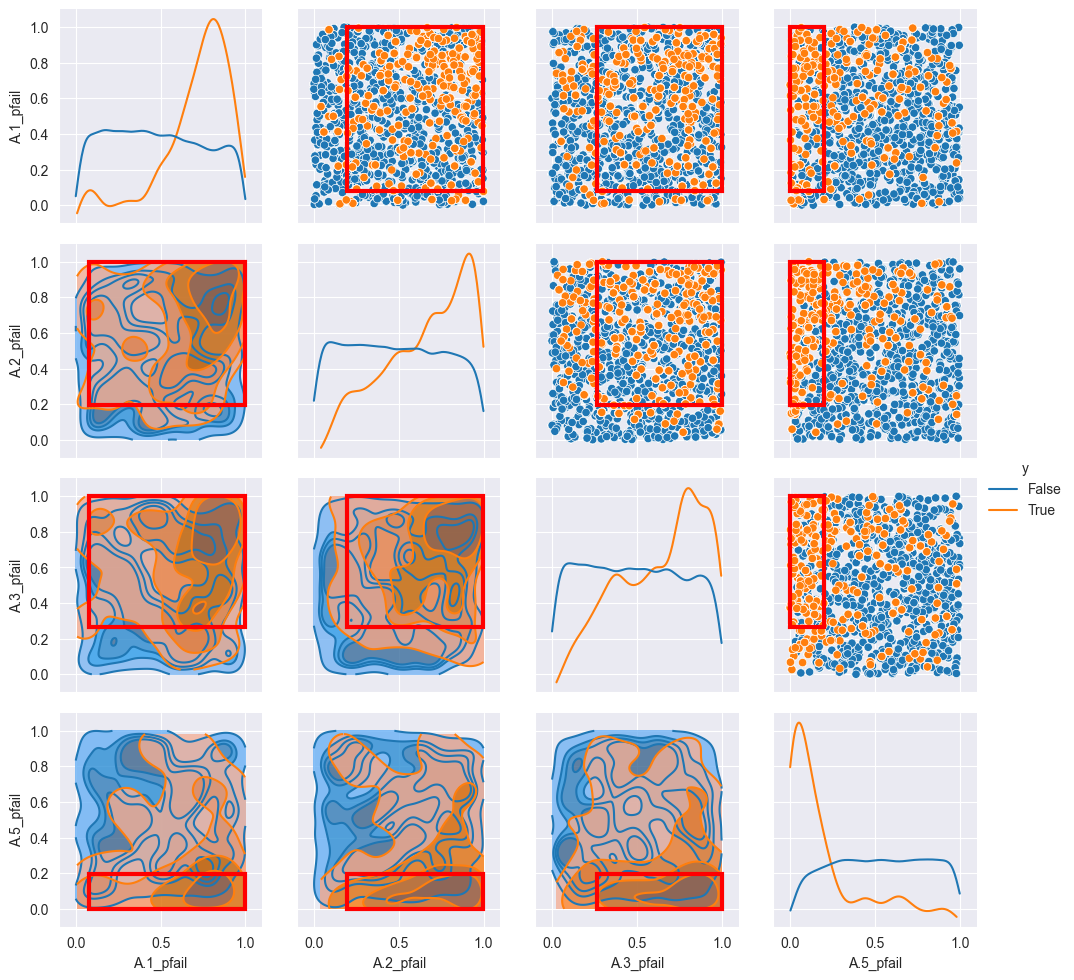

In [18]:
# Show pair scatter plot for the chosen box
box1.show_pairs_scatter(box_number_of_choice)

# Save the pair scatter plot
plot_name = "box_scatter_damage_our_policy"
plot_path = os.path.join(experiment_dir_our_policies_PRIM, f"{plot_name}.png")
plt.savefig(plot_path)

# Show the plot
plt.show()

Again upon visual inspection we see that it is hard to seperate and ecompass all the orange cases in the box. 

#### Let us resample

In [19]:
# Resample the chosen box
box1.resample(box_number_of_choice)

,reproduce coverage,reproduce density
A.1_pfail,100.0,100.0
A.2_pfail,100.0,100.0
A.3_pfail,100.0,100.0
A.5_pfail,100.0,100.0
A.2_Bmax,40.0,40.0
A.4_pfail,40.0,40.0
A.3_Bmax,10.0,10.0
A.4_Bmax,10.0,10.0
A.5_Bmax,10.0,10.0
discount rate 2,0.0,10.0


The first 4 parameters can exactly reproduce coverage and density, confirming the suggestion of highly significant quasi p values. These were the parameters used in the box.  


### 2.4.2. Expected Annual Deaths
We will now execute the same steps for the annual deaths.

In [20]:
# Apply PRIM to the 10% worst outcomes for the expected number of deaths (highest number of deaths)
prim_alg = prim.Prim(x_our_policy, deaths_our_policy, threshold=0.5, peel_alpha=0.1)
box2 = prim_alg.find_box()

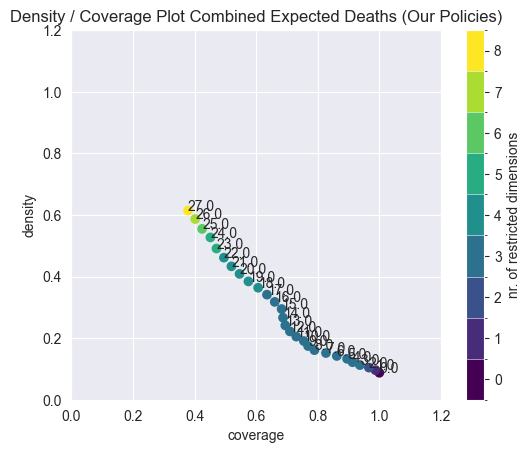

In [21]:
# Show the tradeoff of the created box
box2.show_tradeoff(annotated=True)

# Add a title to the plot
plt.title("Density / Coverage Plot Combined Expected Deaths (Our Policies)")

# Save the tradeoff plot
plot_name = "tradeoff_deaths_our_policy"
plot_path = os.path.join(experiment_dir_our_policies_PRIM, f"{plot_name}.png")
plt.savefig(plot_path)

# Show the plot
plt.show()

In [22]:
# Box X has been selected due to the +/- 80% density
box2_number_of_choice = 23

# Inspect the chosen box
box2.inspect(box2_number_of_choice)[0]

coverage       0.471207
density        0.490952
id            23.000000
k           1031.000000
mass           0.084000
mean           0.490952
n           2100.000000
res_dim        5.000000
Name: 23, dtype: float64

              box 23                                         
                 min         max      qp value       qp value
A.5_pfail   0.000001    0.196845           NaN  9.507305e-320
A.3_pfail   0.346877    0.999373  2.911763e-24            NaN
A.2_pfail   0.193054    0.999195  3.220080e-14            NaN
A.1_pfail   0.080774    0.999611  1.148771e-04            NaN
A.3_Bmax   61.380152  349.843559  3.433235e-03            NaN


Again, we could not capture a high coverage and density indicating that, just as damage, deaths is hard to predict through our uncertainties. 

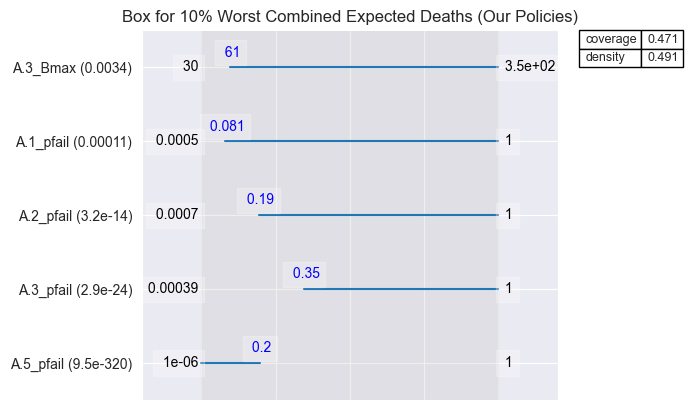

In [23]:
# Inspect the chosen box with a graph style
box2.inspect(box2_number_of_choice, style="graph")

# Add a title to the box inspection plot
plt.title("Box for 10% Worst Combined Expected Deaths (Our Policies)")

# Save the box inspection plot
plot_name = "inspect_box_deaths_our_policy"
plot_path = os.path.join(experiment_dir_our_policies_PRIM, f"{plot_name}.png")
plt.savefig(plot_path)

# Show the plot
plt.show()

This box, needs 5 dimensions instead of the four dimensions for damage. 

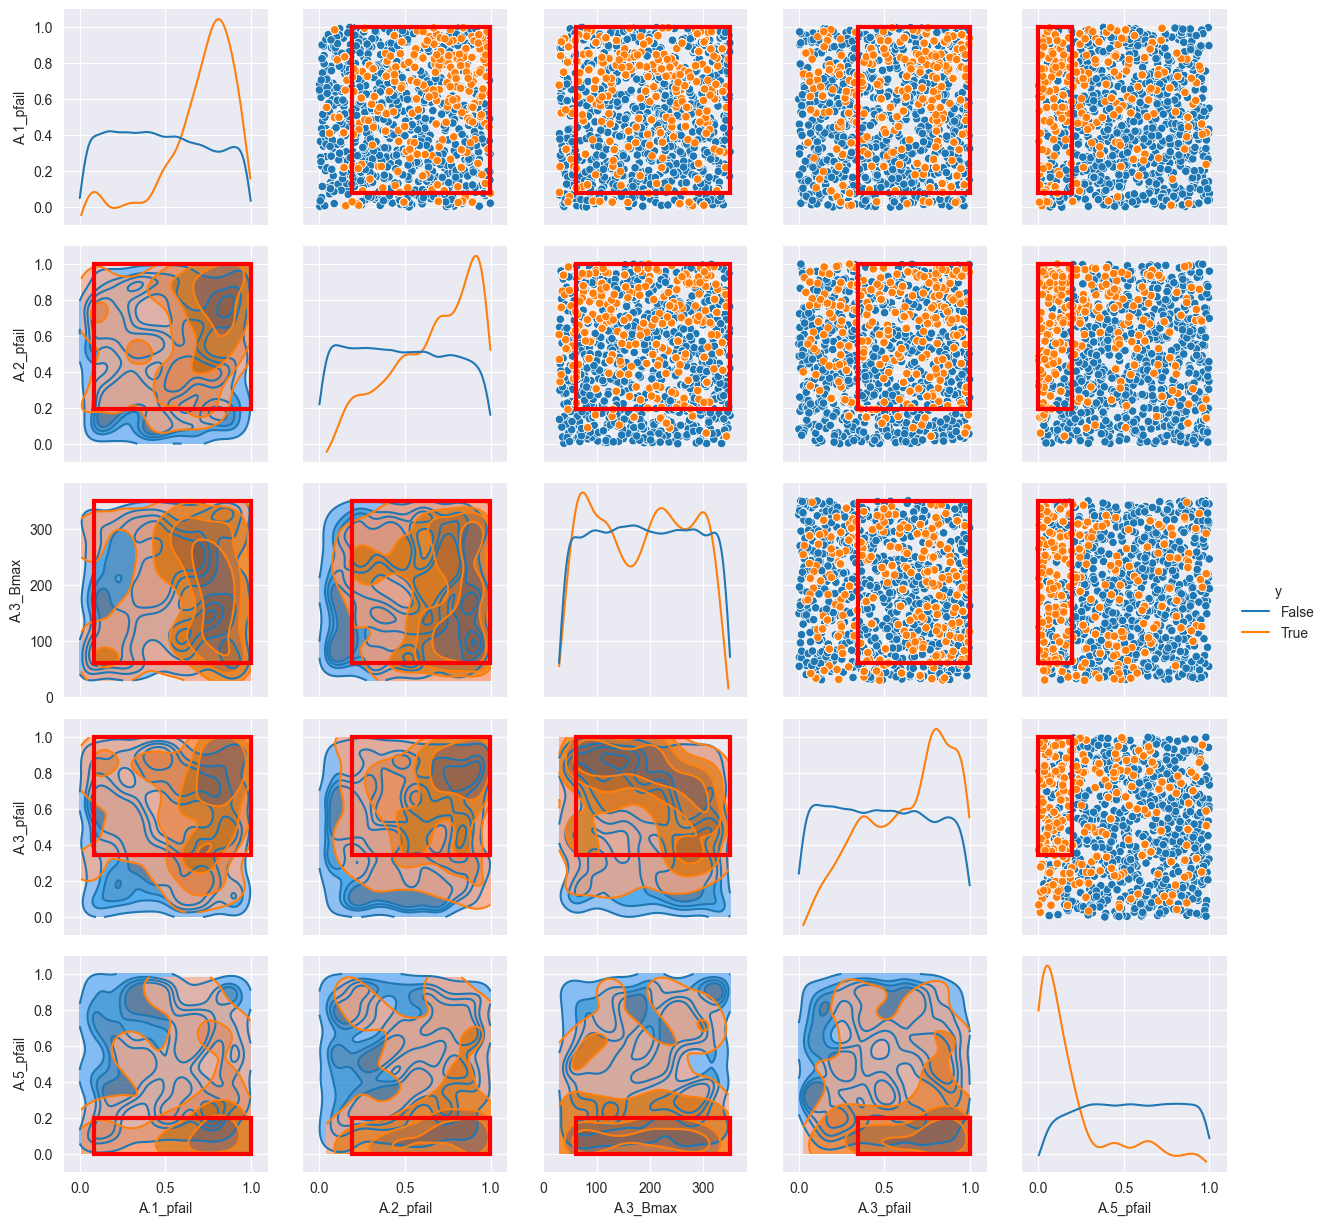

In [24]:
# Show pair scatter plot for the chosen box
box2.show_pairs_scatter(box2_number_of_choice)

# Save the pair scatter plot
plot_name = "box_scatter_deaths_our_policy"
plot_path = os.path.join(experiment_dir_our_policies_PRIM, f"{plot_name}.png")
plt.savefig(plot_path)

# Show the plot
plt.show()

Again we see that it is not possible to capture all the orange dots in these dimensions, and it is hard to define a ruleset that significantly explains the worst outcomes. Indicating that its origins could be plentiful.

In [25]:
# Resample the chosen box
box2.resample(box2_number_of_choice)

,reproduce coverage,reproduce density
A.1_pfail,100.0,100.0
A.2_pfail,100.0,100.0
A.3_pfail,100.0,100.0
A.5_pfail,100.0,100.0
A.4_pfail,90.0,90.0
A.2_Bmax,80.0,70.0
A.1_Bmax,60.0,60.0
A.3_Bmax,20.0,20.0
A.5_Bmax,20.0,20.0
A.3_Brate,0.0,10.0


The first 4 dimensions remain significant upon resampling, however A3_Bmax loses its significance upon resampling the data. It is therefore adviced not to pay much attention to the explanatory value of this variable. 